# Drought Analysis: Exploratory Plots

This notebook generates a set of figures for drought-related variables (precipitation, temperature, humidity, wind, pressure/surface temperature, and drought score).

**Note:** Ensure the CSV file `fips_6107_drought_features.csv` is available in the same directory or update the path in the data loading cell.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

## Style configuration

In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

## Load data

In [4]:
df = pd.read_csv('../data/generated_data/fips_6107_drought_features.csv')
df['date'] = pd.to_datetime(df['date'])

print("="*80)
print("GENERATING INDIVIDUAL VARIABLE PLOTS FOR DROUGHT ANALYSIS")
print("="*80)

GENERATING INDIVIDUAL VARIABLE PLOTS FOR DROUGHT ANALYSIS


## Figure 1: Precipitation Variables


Generating Figure 1: Precipitation Analysis...
✓ Saved: drought_precipitation_analysis.png


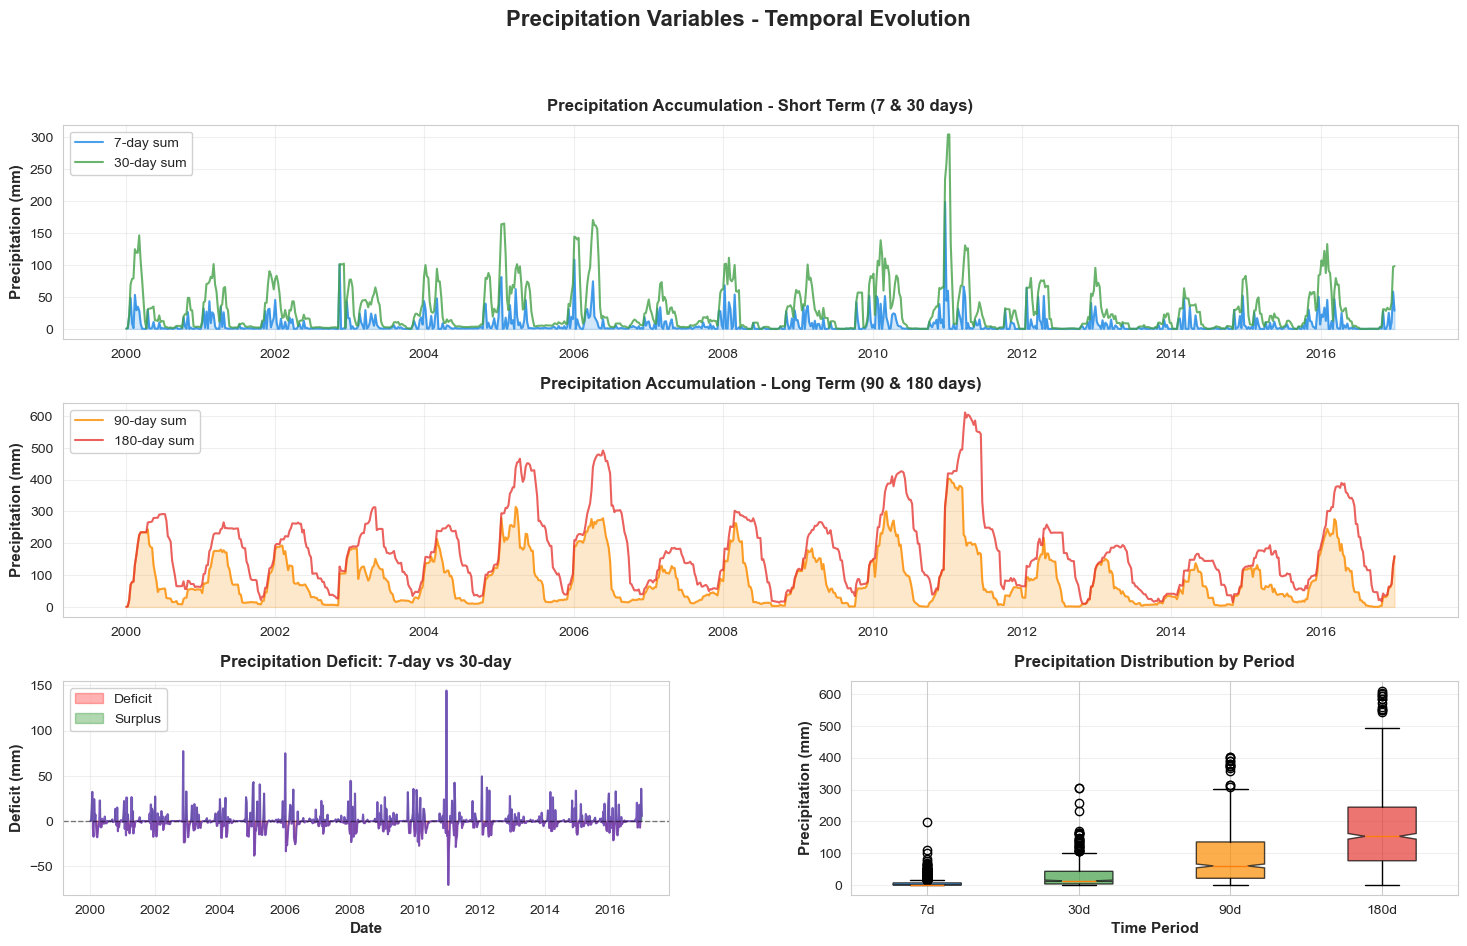

In [5]:
print("\nGenerating Figure 1: Precipitation Analysis...")

fig1 = plt.figure(figsize=(18, 10))
gs1 = GridSpec(3, 2, figure=fig1, hspace=0.3, wspace=0.3)
fig1.suptitle('Precipitation Variables - Temporal Evolution', fontsize=16, fontweight='bold', y=0.995)

# Precipitation sums over different periods
ax1 = fig1.add_subplot(gs1[0, :])
ax1.plot(df['date'], df['prec_sum_7d'], label='7-day sum', linewidth=1.5, alpha=0.8, color='#1E88E5')
ax1.plot(df['date'], df['prec_sum_30d'], label='30-day sum', linewidth=1.5, alpha=0.8, color='#43A047')
ax1.fill_between(df['date'], df['prec_sum_7d'], alpha=0.2, color='#1E88E5')
ax1.set_ylabel('Precipitation (mm)', fontsize=11, fontweight='bold')
ax1.set_title('Precipitation Accumulation - Short Term (7 & 30 days)', fontsize=12, fontweight='bold', pad=10)
ax1.legend(loc='upper left', framealpha=0.9)
ax1.grid(True, alpha=0.3)

# Longer-term precipitation
ax2 = fig1.add_subplot(gs1[1, :])
ax2.plot(df['date'], df['prec_sum_90d'], label='90-day sum', linewidth=1.5, alpha=0.8, color='#FB8C00')
ax2.plot(df['date'], df['prec_sum_180d'], label='180-day sum', linewidth=1.5, alpha=0.8, color='#E53935')
ax2.fill_between(df['date'], df['prec_sum_90d'], alpha=0.2, color='#FB8C00')
ax2.set_ylabel('Precipitation (mm)', fontsize=11, fontweight='bold')
ax2.set_title('Precipitation Accumulation - Long Term (90 & 180 days)', fontsize=12, fontweight='bold', pad=10)
ax2.legend(loc='upper left', framealpha=0.9)
ax2.grid(True, alpha=0.3)

# Precipitation deficit
ax3 = fig1.add_subplot(gs1[2, 0])
ax3.plot(df['date'], df['prec_deficit_7v30d'], linewidth=1.5, alpha=0.8, color='#5E35B1')
ax3.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax3.fill_between(df['date'], df['prec_deficit_7v30d'], 0, 
                 where=(df['prec_deficit_7v30d'] < 0), alpha=0.3, color='red', label='Deficit')
ax3.fill_between(df['date'], df['prec_deficit_7v30d'], 0, 
                 where=(df['prec_deficit_7v30d'] >= 0), alpha=0.3, color='green', label='Surplus')
ax3.set_ylabel('Deficit (mm)', fontsize=11, fontweight='bold')
ax3.set_xlabel('Date', fontsize=11, fontweight='bold')
ax3.set_title('Precipitation Deficit: 7-day vs 30-day', fontsize=12, fontweight='bold', pad=10)
ax3.legend(loc='upper left', framealpha=0.9)
ax3.grid(True, alpha=0.3)

# Distribution boxplot
ax4 = fig1.add_subplot(gs1[2, 1])
prec_data = [df['prec_sum_7d'].dropna(), df['prec_sum_30d'].dropna(), 
             df['prec_sum_90d'].dropna(), df['prec_sum_180d'].dropna()]
bp1 = ax4.boxplot(prec_data, labels=['7d', '30d', '90d', '180d'], patch_artist=True, notch=True)
colors = ['#1E88E5', '#43A047', '#FB8C00', '#E53935']
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax4.set_ylabel('Precipitation (mm)', fontsize=11, fontweight='bold')
ax4.set_xlabel('Time Period', fontsize=11, fontweight='bold')
ax4.set_title('Precipitation Distribution by Period', fontsize=12, fontweight='bold', pad=10)
ax4.grid(axis='y', alpha=0.3)

plt.savefig('drought_precipitation_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: drought_precipitation_analysis.png")

## Figure 2: Temperature Variables

Generating Figure 2: Temperature Analysis...
✓ Saved: drought_temperature_analysis.png


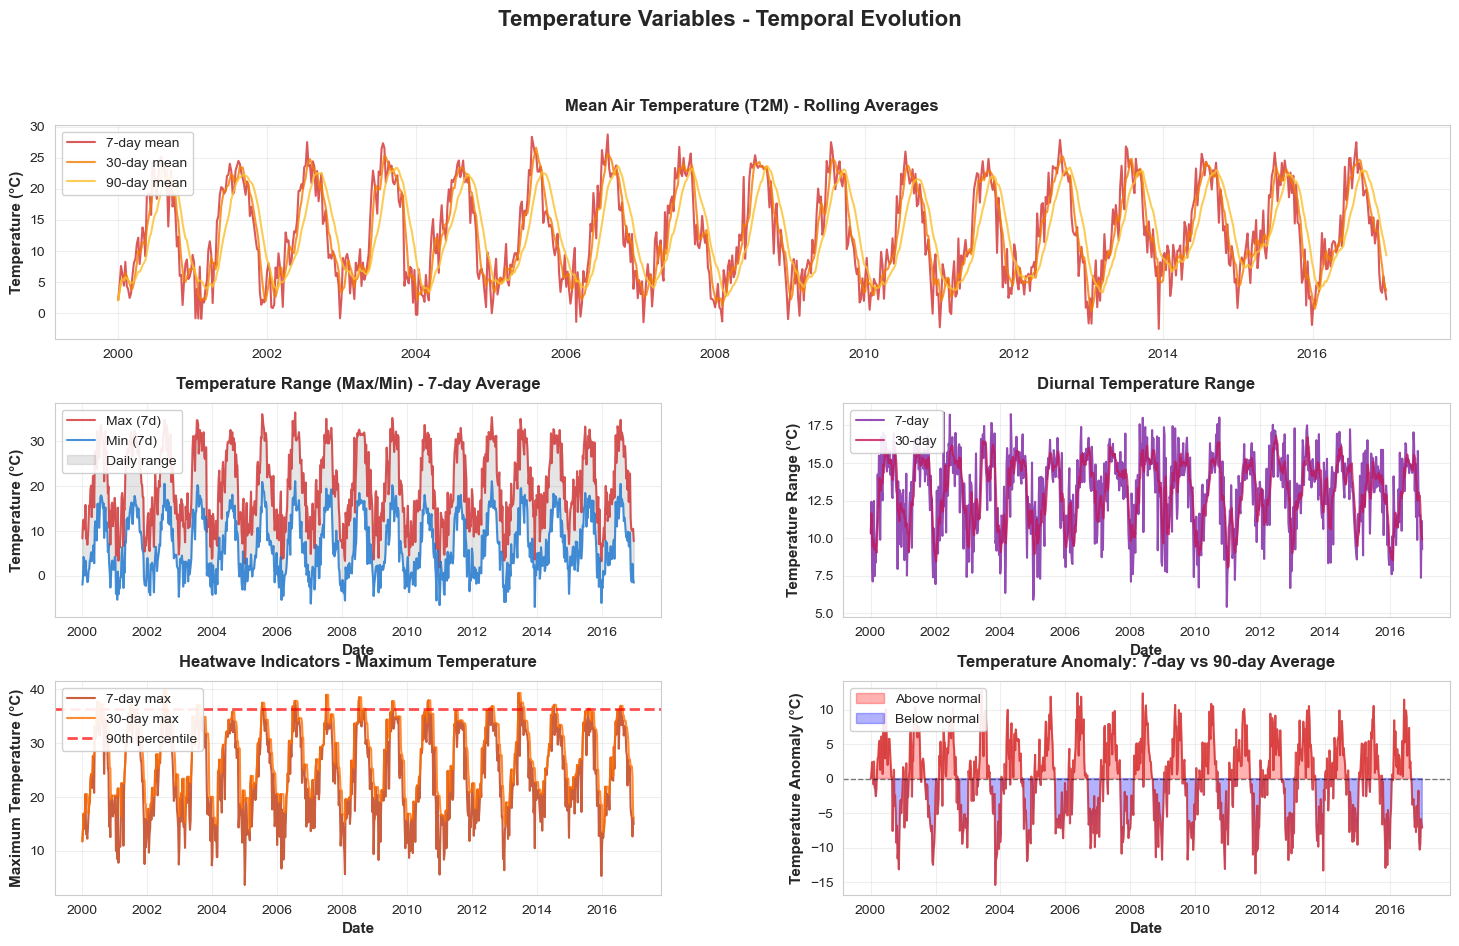

In [6]:
print("Generating Figure 2: Temperature Analysis...")

fig2 = plt.figure(figsize=(18, 10))
gs2 = GridSpec(3, 2, figure=fig2, hspace=0.3, wspace=0.3)
fig2.suptitle('Temperature Variables - Temporal Evolution', fontsize=16, fontweight='bold', y=0.995)

# Mean temperature over different periods
ax1 = fig2.add_subplot(gs2[0, :])
ax1.plot(df['date'], df['t2m_mean_7d'], label='7-day mean', linewidth=1.5, alpha=0.8, color='#D32F2F')
ax1.plot(df['date'], df['t2m_mean_30d'], label='30-day mean', linewidth=1.5, alpha=0.8, color='#F57C00')
ax1.plot(df['date'], df['t2m_mean_90d'], label='90-day mean', linewidth=1.5, alpha=0.8, color='#FBC02D')
ax1.set_ylabel('Temperature (°C)', fontsize=11, fontweight='bold')
ax1.set_title('Mean Air Temperature (T2M) - Rolling Averages', fontsize=12, fontweight='bold', pad=10)
ax1.legend(loc='upper left', framealpha=0.9)
ax1.grid(True, alpha=0.3)

# Max and Min temperature ranges
ax2 = fig2.add_subplot(gs2[1, 0])
ax2.plot(df['date'], df['t2m_max_mean_7d'], label='Max (7d)', linewidth=1.5, alpha=0.8, color='#D32F2F')
ax2.plot(df['date'], df['t2m_min_mean_7d'], label='Min (7d)', linewidth=1.5, alpha=0.8, color='#1976D2')
ax2.fill_between(df['date'], df['t2m_min_mean_7d'], df['t2m_max_mean_7d'], 
                 alpha=0.2, color='gray', label='Daily range')
ax2.set_ylabel('Temperature (°C)', fontsize=11, fontweight='bold')
ax2.set_xlabel('Date', fontsize=11, fontweight='bold')
ax2.set_title('Temperature Range (Max/Min) - 7-day Average', fontsize=12, fontweight='bold', pad=10)
ax2.legend(loc='upper left', framealpha=0.9)
ax2.grid(True, alpha=0.3)

# Temperature range variability
ax3 = fig2.add_subplot(gs2[1, 1])
ax3.plot(df['date'], df['t2m_range_mean_7d'], label='7-day', linewidth=1.5, alpha=0.8, color='#7B1FA2')
ax3.plot(df['date'], df['t2m_range_mean_30d'], label='30-day', linewidth=1.5, alpha=0.8, color='#C2185B')
ax3.set_ylabel('Temperature Range (°C)', fontsize=11, fontweight='bold')
ax3.set_xlabel('Date', fontsize=11, fontweight='bold')
ax3.set_title('Diurnal Temperature Range', fontsize=12, fontweight='bold', pad=10)
ax3.legend(loc='upper left', framealpha=0.9)
ax3.grid(True, alpha=0.3)

# Heatwave indicators (maximum temperatures)
ax4 = fig2.add_subplot(gs2[2, 0])
ax4.plot(df['date'], df['t2m_max_7d'], label='7-day max', linewidth=1.5, alpha=0.8, color='#BF360C')
ax4.plot(df['date'], df['t2m_max_30d'], label='30-day max', linewidth=1.5, alpha=0.8, color='#FF6F00')
ax4.axhline(y=df['t2m_max_30d'].quantile(0.90), color='red', linestyle='--', 
            linewidth=2, alpha=0.7, label='90th percentile')
ax4.set_ylabel('Maximum Temperature (°C)', fontsize=11, fontweight='bold')
ax4.set_xlabel('Date', fontsize=11, fontweight='bold')
ax4.set_title('Heatwave Indicators - Maximum Temperature', fontsize=12, fontweight='bold', pad=10)
ax4.legend(loc='upper left', framealpha=0.9)
ax4.grid(True, alpha=0.3)

# Temperature anomaly
ax5 = fig2.add_subplot(gs2[2, 1])
ax5.plot(df['date'], df['temp_anomaly_7v90d'], linewidth=1.5, alpha=0.8, color='#D32F2F')
ax5.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax5.fill_between(df['date'], df['temp_anomaly_7v90d'], 0, 
                 where=(df['temp_anomaly_7v90d'] > 0), alpha=0.3, color='red', label='Above normal')
ax5.fill_between(df['date'], df['temp_anomaly_7v90d'], 0, 
                 where=(df['temp_anomaly_7v90d'] <= 0), alpha=0.3, color='blue', label='Below normal')
ax5.set_ylabel('Temperature Anomaly (°C)', fontsize=11, fontweight='bold')
ax5.set_xlabel('Date', fontsize=11, fontweight='bold')
ax5.set_title('Temperature Anomaly: 7-day vs 90-day Average', fontsize=12, fontweight='bold', pad=10)
ax5.legend(loc='upper left', framealpha=0.9)
ax5.grid(True, alpha=0.3)

plt.savefig('drought_temperature_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: drought_temperature_analysis.png")

## Figure 3: Humidity Variables

Generating Figure 3: Humidity Analysis...
✓ Saved: drought_humidity_analysis.png


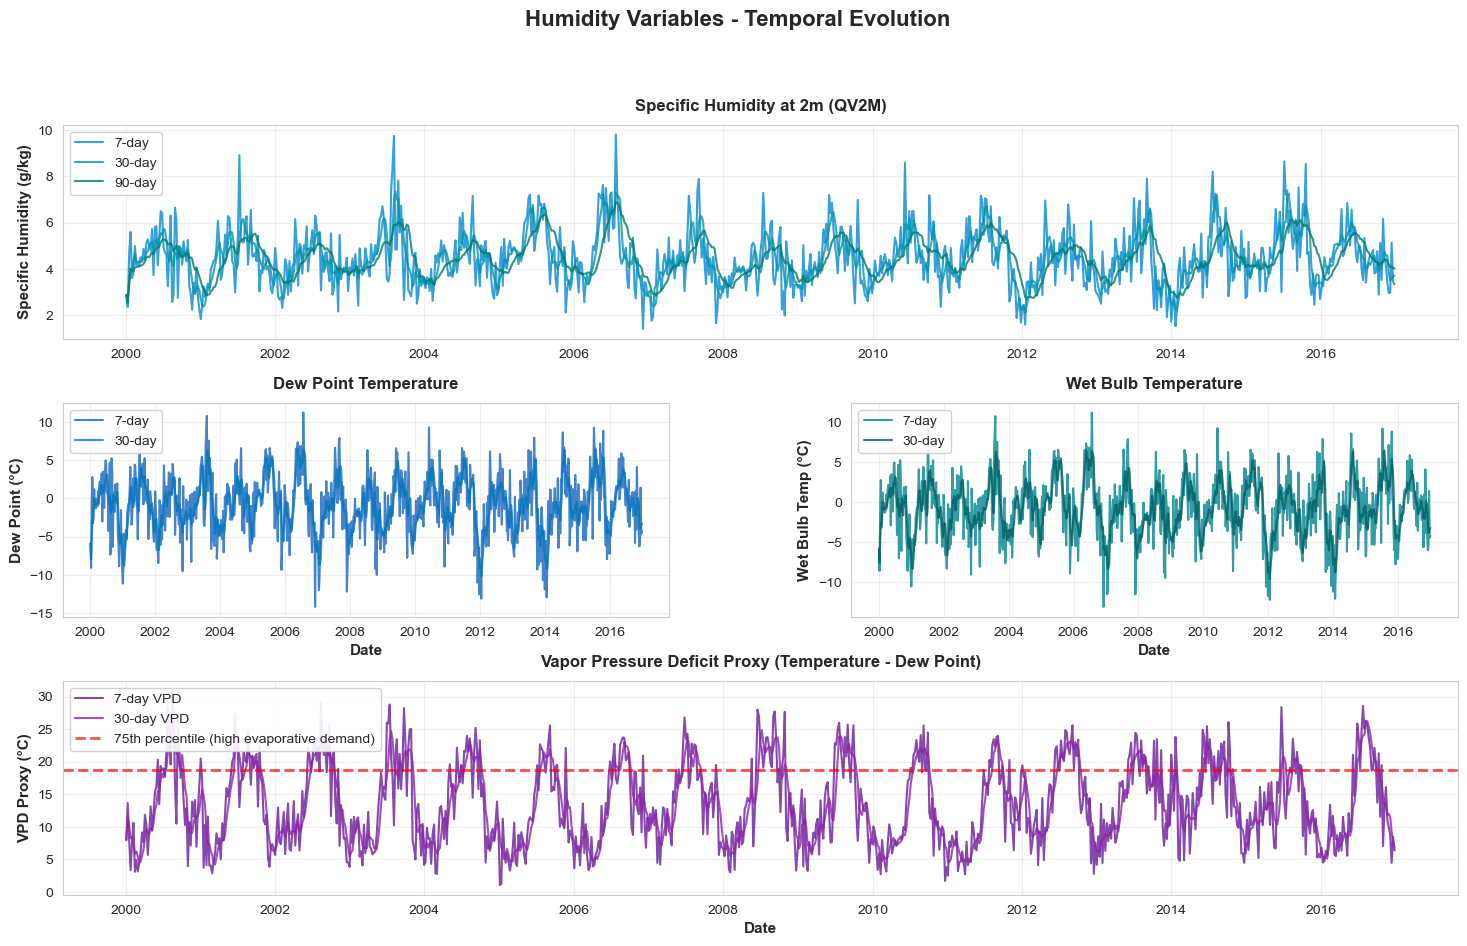

In [7]:
print("Generating Figure 3: Humidity Analysis...")

fig3 = plt.figure(figsize=(18, 10))
gs3 = GridSpec(3, 2, figure=fig3, hspace=0.3, wspace=0.3)
fig3.suptitle('Humidity Variables - Temporal Evolution', fontsize=16, fontweight='bold', y=0.995)

# Specific humidity (QV2M)
ax1 = fig3.add_subplot(gs3[0, :])
ax1.plot(df['date'], df['qv2m_mean_7d'], label='7-day', linewidth=1.5, alpha=0.8, color='#0288D1')
ax1.plot(df['date'], df['qv2m_mean_30d'], label='30-day', linewidth=1.5, alpha=0.8, color='#0097A7')
ax1.plot(df['date'], df['qv2m_mean_90d'], label='90-day', linewidth=1.5, alpha=0.8, color='#00796B')
ax1.set_ylabel('Specific Humidity (g/kg)', fontsize=11, fontweight='bold')
ax1.set_title('Specific Humidity at 2m (QV2M)', fontsize=12, fontweight='bold', pad=10)
ax1.legend(loc='upper left', framealpha=0.9)
ax1.grid(True, alpha=0.3)

# Dew point temperature
ax2 = fig3.add_subplot(gs3[1, 0])
ax2.plot(df['date'], df['t2mdew_mean_7d'], label='7-day', linewidth=1.5, alpha=0.8, color='#1565C0')
ax2.plot(df['date'], df['t2mdew_mean_30d'], label='30-day', linewidth=1.5, alpha=0.8, color='#0277BD')
ax2.set_ylabel('Dew Point (°C)', fontsize=11, fontweight='bold')
ax2.set_xlabel('Date', fontsize=11, fontweight='bold')
ax2.set_title('Dew Point Temperature', fontsize=12, fontweight='bold', pad=10)
ax2.legend(loc='upper left', framealpha=0.9)
ax2.grid(True, alpha=0.3)

# Wet bulb temperature
ax3 = fig3.add_subplot(gs3[1, 1])
ax3.plot(df['date'], df['t2mwet_mean_7d'], label='7-day', linewidth=1.5, alpha=0.8, color='#00838F')
ax3.plot(df['date'], df['t2mwet_mean_30d'], label='30-day', linewidth=1.5, alpha=0.8, color='#006064')
ax3.set_ylabel('Wet Bulb Temp (°C)', fontsize=11, fontweight='bold')
ax3.set_xlabel('Date', fontsize=11, fontweight='bold')
ax3.set_title('Wet Bulb Temperature', fontsize=12, fontweight='bold', pad=10)
ax3.legend(loc='upper left', framealpha=0.9)
ax3.grid(True, alpha=0.3)

# Vapor Pressure Deficit Proxy
ax4 = fig3.add_subplot(gs3[2, :])
ax4.plot(df['date'], df['vpd_proxy_7d'], label='7-day VPD', linewidth=1.5, alpha=0.8, color='#6A1B9A')
ax4.plot(df['date'], df['vpd_proxy_30d'], label='30-day VPD', linewidth=1.5, alpha=0.8, color='#8E24AA')
ax4.axhline(y=df['vpd_proxy_30d'].quantile(0.75), color='red', linestyle='--', 
            linewidth=2, alpha=0.7, label='75th percentile (high evaporative demand)')
ax4.set_ylabel('VPD Proxy (°C)', fontsize=11, fontweight='bold')
ax4.set_xlabel('Date', fontsize=11, fontweight='bold')
ax4.set_title('Vapor Pressure Deficit Proxy (Temperature - Dew Point)', fontsize=12, fontweight='bold', pad=10)
ax4.legend(loc='upper left', framealpha=0.9)
ax4.grid(True, alpha=0.3)

plt.savefig('drought_humidity_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: drought_humidity_analysis.png")

## Figure 4: Wind Variables

Generating Figure 4: Wind Analysis...
✓ Saved: drought_wind_analysis.png


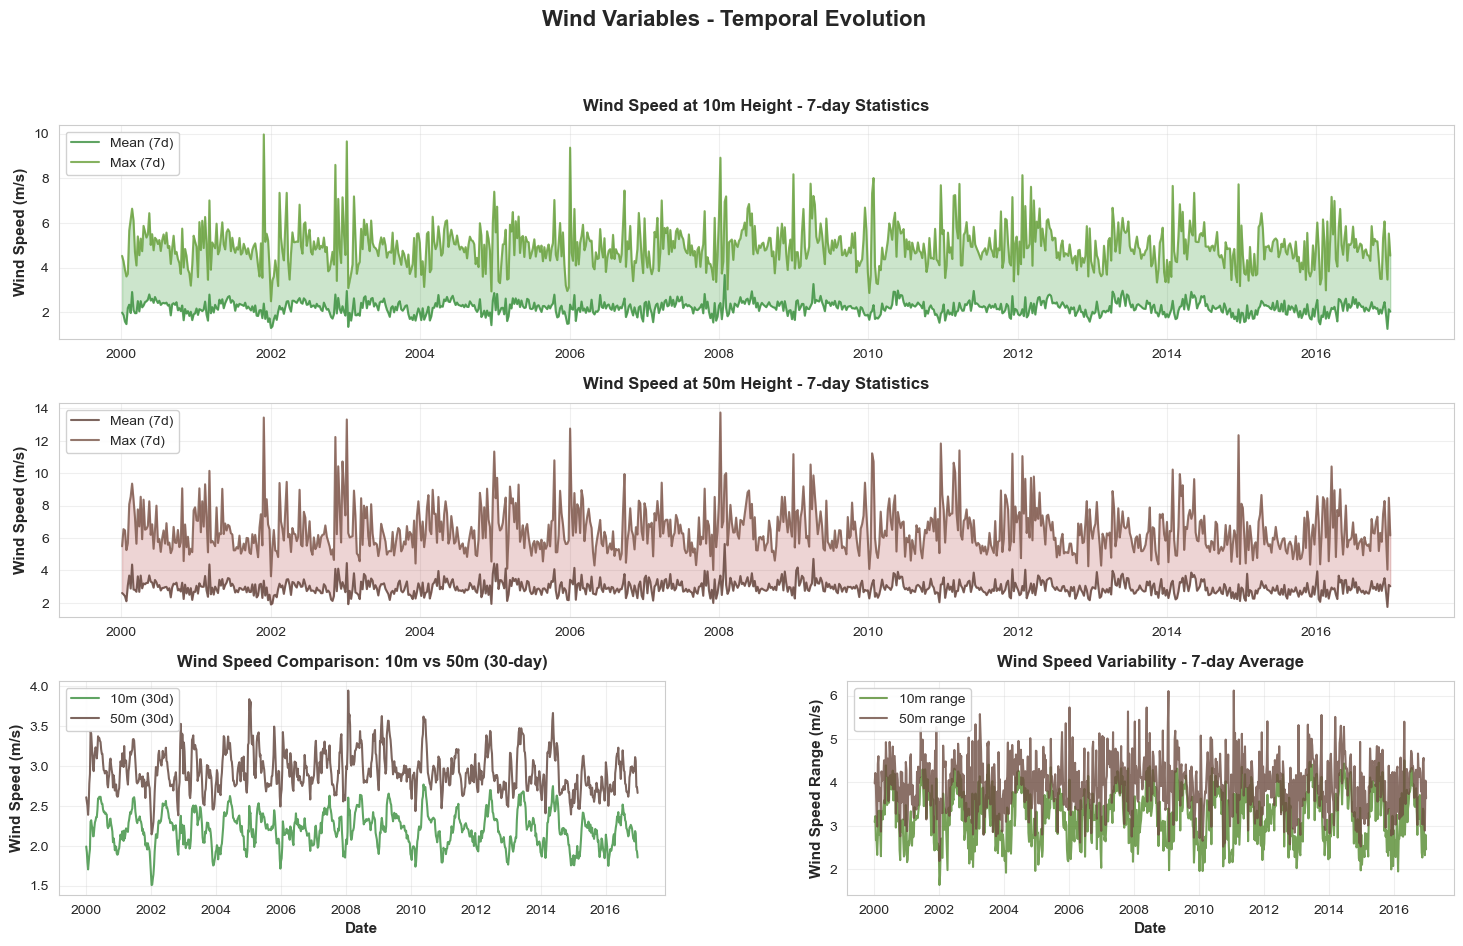

In [8]:
print("Generating Figure 4: Wind Analysis...")

fig4 = plt.figure(figsize=(18, 10))
gs4 = GridSpec(3, 2, figure=fig4, hspace=0.3, wspace=0.3)
fig4.suptitle('Wind Variables - Temporal Evolution', fontsize=16, fontweight='bold', y=0.995)

# Wind speed at 10m
ax1 = fig4.add_subplot(gs4[0, :])
ax1.plot(df['date'], df['ws10m_mean_7d'], label='Mean (7d)', linewidth=1.5, alpha=0.8, color='#388E3C')
ax1.plot(df['date'], df['ws10m_max_7d'], label='Max (7d)', linewidth=1.5, alpha=0.8, color='#689F38')
ax1.fill_between(df['date'], df['ws10m_mean_7d'], df['ws10m_max_7d'], 
                 alpha=0.2, color='green')
ax1.set_ylabel('Wind Speed (m/s)', fontsize=11, fontweight='bold')
ax1.set_title('Wind Speed at 10m Height - 7-day Statistics', fontsize=12, fontweight='bold', pad=10)
ax1.legend(loc='upper left', framealpha=0.9)
ax1.grid(True, alpha=0.3)

# Wind speed at 50m
ax2 = fig4.add_subplot(gs4[1, :])
ax2.plot(df['date'], df['ws50m_mean_7d'], label='Mean (7d)', linewidth=1.5, alpha=0.8, color='#5D4037')
ax2.plot(df['date'], df['ws50m_max_7d'], label='Max (7d)', linewidth=1.5, alpha=0.8, color='#795548')
ax2.fill_between(df['date'], df['ws50m_mean_7d'], df['ws50m_max_7d'], 
                 alpha=0.2, color='brown')
ax2.set_ylabel('Wind Speed (m/s)', fontsize=11, fontweight='bold')
ax2.set_title('Wind Speed at 50m Height - 7-day Statistics', fontsize=12, fontweight='bold', pad=10)
ax2.legend(loc='upper left', framealpha=0.9)
ax2.grid(True, alpha=0.3)

# Wind comparison 10m vs 50m
ax3 = fig4.add_subplot(gs4[2, 0])
ax3.plot(df['date'], df['ws10m_mean_30d'], label='10m (30d)', linewidth=1.5, alpha=0.8, color='#388E3C')
ax3.plot(df['date'], df['ws50m_mean_30d'], label='50m (30d)', linewidth=1.5, alpha=0.8, color='#5D4037')
ax3.set_ylabel('Wind Speed (m/s)', fontsize=11, fontweight='bold')
ax3.set_xlabel('Date', fontsize=11, fontweight='bold')
ax3.set_title('Wind Speed Comparison: 10m vs 50m (30-day)', fontsize=12, fontweight='bold', pad=10)
ax3.legend(loc='upper left', framealpha=0.9)
ax3.grid(True, alpha=0.3)

# Wind range/variability
ax4 = fig4.add_subplot(gs4[2, 1])
ax4.plot(df['date'], df['ws10m_range_mean_7d'], label='10m range', linewidth=1.5, alpha=0.8, color='#558B2F')
ax4.plot(df['date'], df['ws50m_range_mean_7d'], label='50m range', linewidth=1.5, alpha=0.8, color='#6D4C41')
ax4.set_ylabel('Wind Speed Range (m/s)', fontsize=11, fontweight='bold')
ax4.set_xlabel('Date', fontsize=11, fontweight='bold')
ax4.set_title('Wind Speed Variability - 7-day Average', fontsize=12, fontweight='bold', pad=10)
ax4.legend(loc='upper left', framealpha=0.9)
ax4.grid(True, alpha=0.3)

plt.savefig('drought_wind_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: drought_wind_analysis.png")

## Figure 5: Pressure and Surface Temperature

Generating Figure 5: Pressure & Surface Temperature Analysis...
✓ Saved: drought_pressure_surface_analysis.png


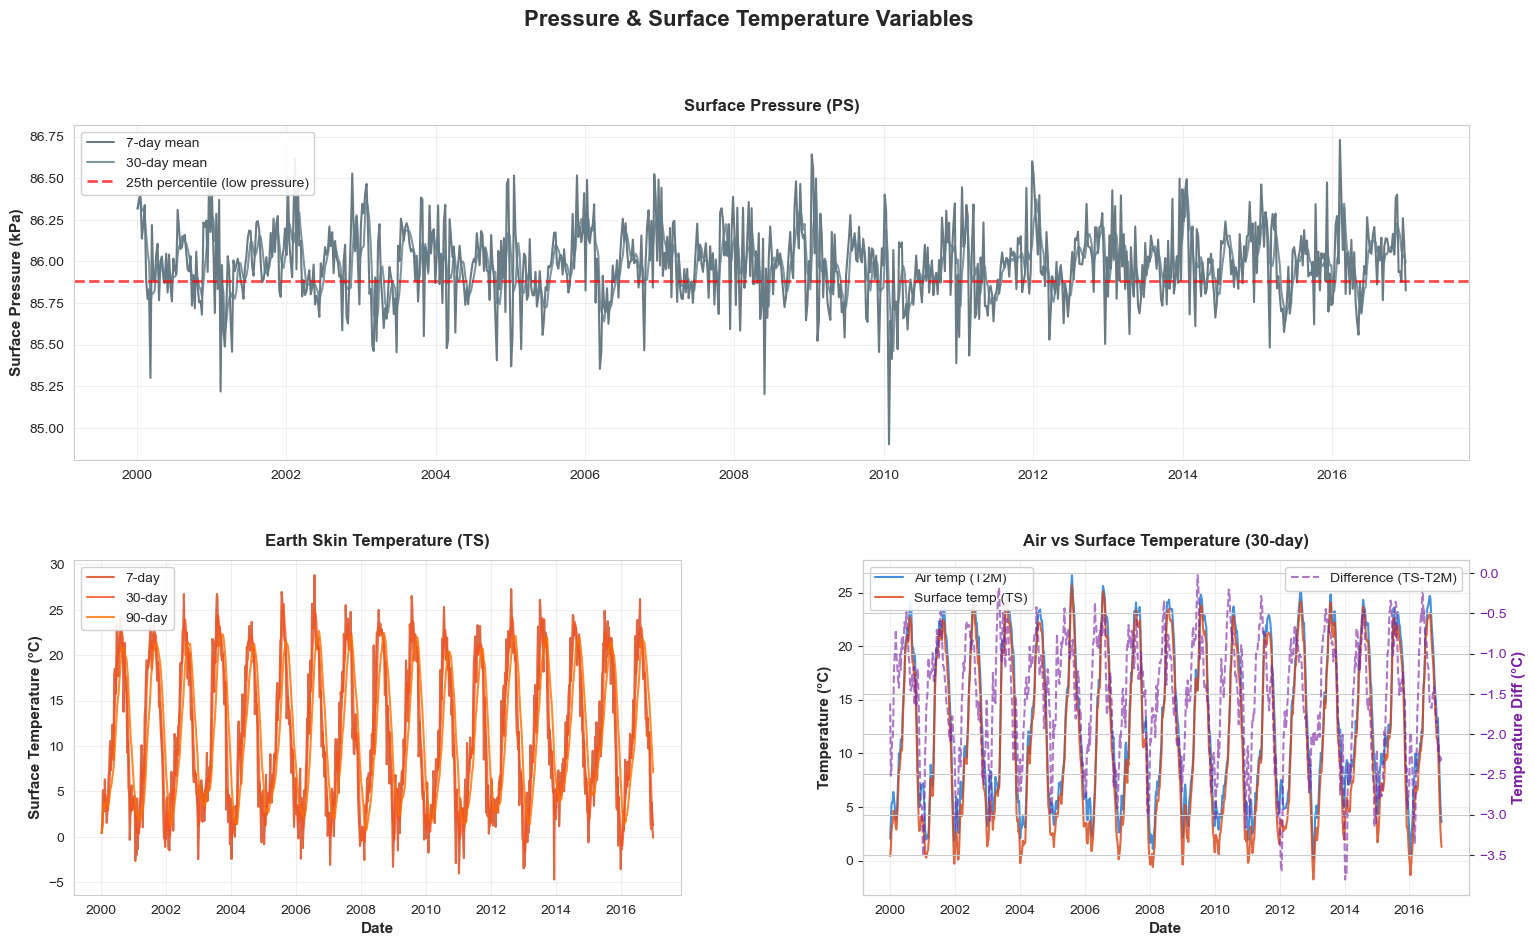

In [9]:
print("Generating Figure 5: Pressure & Surface Temperature Analysis...")

fig5 = plt.figure(figsize=(18, 10))
gs5 = GridSpec(2, 2, figure=fig5, hspace=0.3, wspace=0.3)
fig5.suptitle('Pressure & Surface Temperature Variables', fontsize=16, fontweight='bold', y=0.995)

# Surface pressure
ax1 = fig5.add_subplot(gs5[0, :])
ax1.plot(df['date'], df['ps_mean_7d'], label='7-day mean', linewidth=1.5, alpha=0.8, color='#455A64')
ax1.plot(df['date'], df['ps_mean_30d'], label='30-day mean', linewidth=1.5, alpha=0.8, color='#607D8B')
ax1.axhline(y=df['ps_mean_30d'].quantile(0.25), color='red', linestyle='--', 
            linewidth=2, alpha=0.7, label='25th percentile (low pressure)')
ax1.set_ylabel('Surface Pressure (kPa)', fontsize=11, fontweight='bold')
ax1.set_title('Surface Pressure (PS)', fontsize=12, fontweight='bold', pad=10)
ax1.legend(loc='upper left', framealpha=0.9)
ax1.grid(True, alpha=0.3)

# Surface temperature (TS)
ax2 = fig5.add_subplot(gs5[1, 0])
ax2.plot(df['date'], df['ts_mean_7d'], label='7-day', linewidth=1.5, alpha=0.8, color='#D84315')
ax2.plot(df['date'], df['ts_mean_30d'], label='30-day', linewidth=1.5, alpha=0.8, color='#F4511E')
ax2.plot(df['date'], df['ts_mean_90d'], label='90-day', linewidth=1.5, alpha=0.8, color='#FF6F00')
ax2.set_ylabel('Surface Temperature (°C)', fontsize=11, fontweight='bold')
ax2.set_xlabel('Date', fontsize=11, fontweight='bold')
ax2.set_title('Earth Skin Temperature (TS)', fontsize=12, fontweight='bold', pad=10)
ax2.legend(loc='upper left', framealpha=0.9)
ax2.grid(True, alpha=0.3)

# Comparison: Air temp vs Surface temp
ax3 = fig5.add_subplot(gs5[1, 1])
ax3.plot(df['date'], df['t2m_mean_30d'], label='Air temp (T2M)', linewidth=1.5, alpha=0.8, color='#1976D2')
ax3.plot(df['date'], df['ts_mean_30d'], label='Surface temp (TS)', linewidth=1.5, alpha=0.8, color='#D84315')
temp_diff = df['ts_mean_30d'] - df['t2m_mean_30d']
ax3_twin = ax3.twinx()
ax3_twin.plot(df['date'], temp_diff, label='Difference (TS-T2M)', 
              linewidth=1.5, alpha=0.6, color='#7B1FA2', linestyle='--')
ax3.set_ylabel('Temperature (°C)', fontsize=11, fontweight='bold')
ax3_twin.set_ylabel('Temperature Diff (°C)', fontsize=11, fontweight='bold', color='#7B1FA2')
ax3_twin.tick_params(axis='y', labelcolor='#7B1FA2')
ax3.set_xlabel('Date', fontsize=11, fontweight='bold')
ax3.set_title('Air vs Surface Temperature (30-day)', fontsize=12, fontweight='bold', pad=10)
ax3.legend(loc='upper left', framealpha=0.9)
ax3_twin.legend(loc='upper right', framealpha=0.9)
ax3.grid(True, alpha=0.3)

plt.savefig('drought_pressure_surface_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: drought_pressure_surface_analysis.png")

## Figure 6: Drought Score with Key Variables

Generating Figure 6: Drought Score with Key Variables...
✓ Saved: drought_score_vs_variables.png


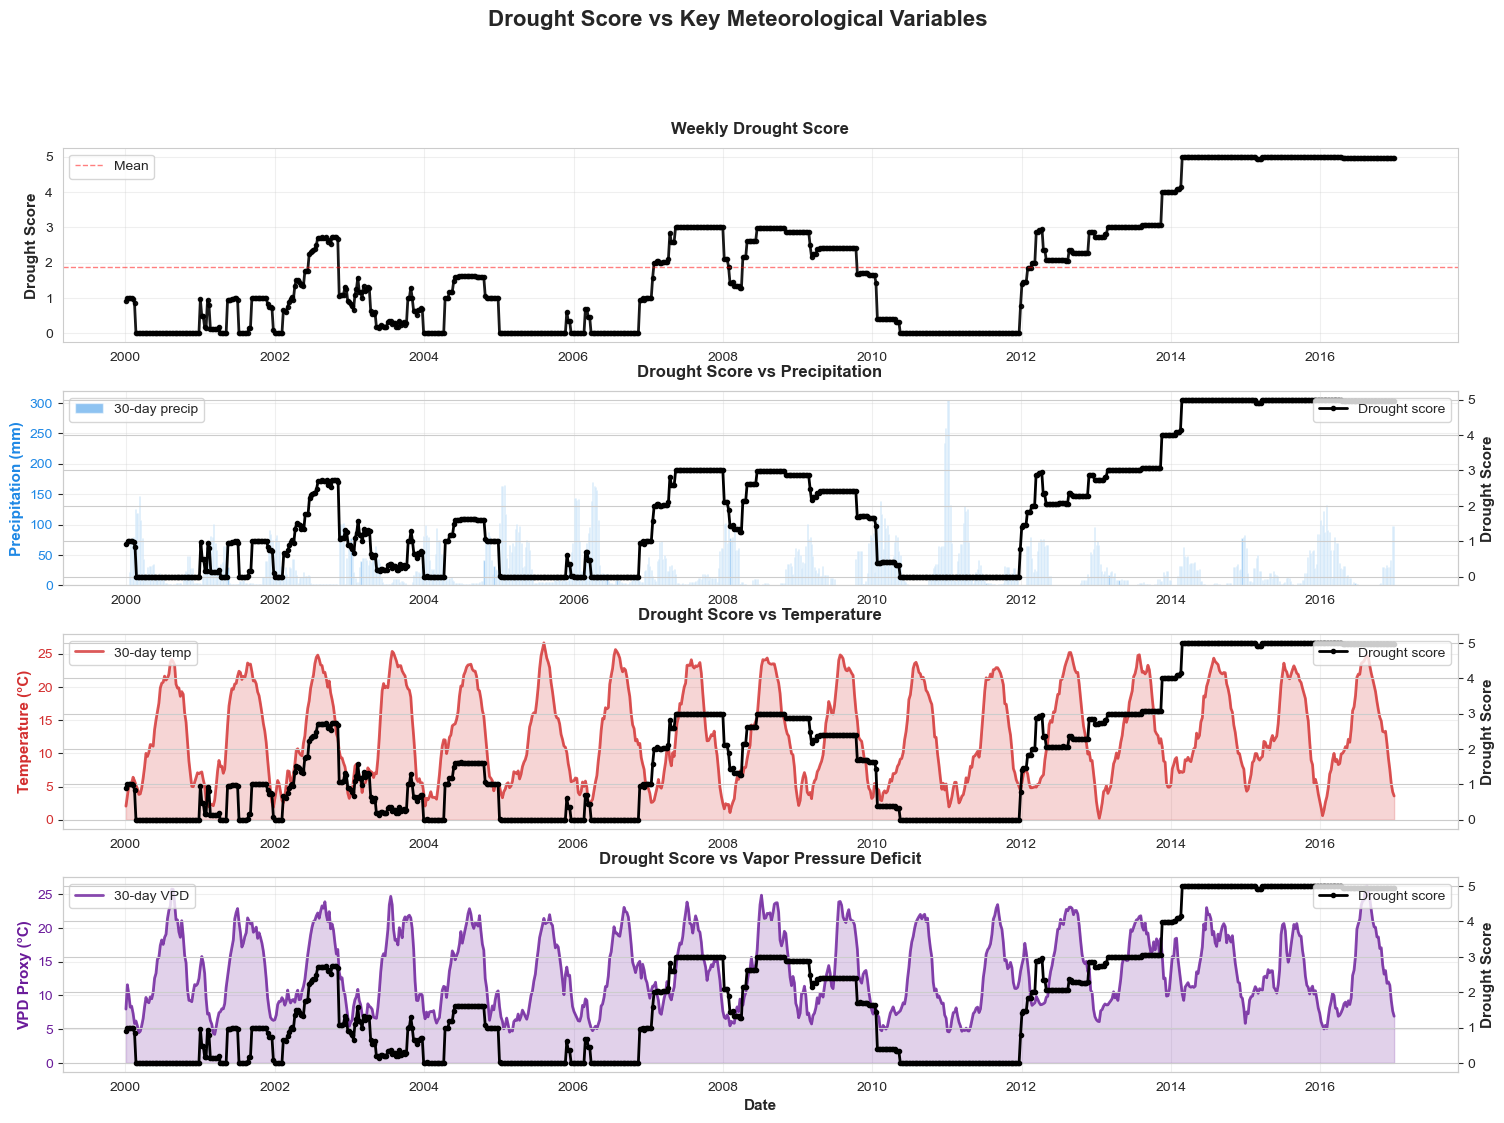

In [13]:
print("Generating Figure 6: Drought Score with Key Variables...")

fig6 = plt.figure(figsize=(18, 12))
gs6 = GridSpec(4, 1, figure=fig6, hspace=0.25)
fig6.suptitle('Drought Score vs Key Meteorological Variables', fontsize=16, fontweight='bold', y=0.995)

# Drought score
ax1 = fig6.add_subplot(gs6[0])
ax1.plot(df['date'], df['score'], linewidth=2, alpha=0.9, color='#000000', marker='o', markersize=3)
ax1.set_ylabel('Drought Score', fontsize=11, fontweight='bold')
ax1.set_title('Weekly Drought Score', fontsize=12, fontweight='bold', pad=10)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=df['score'].mean(), color='red', linestyle='--', linewidth=1, alpha=0.5, label='Mean')
ax1.legend()

# With precipitation
ax2 = fig6.add_subplot(gs6[1])
ax2_score = ax2.twinx()
ax2.bar(df['date'], df['prec_sum_30d'], alpha=0.5, color='#1E88E5', width=5, label='30-day precip')
ax2_score.plot(df['date'], df['score'], linewidth=2, color='#000000', marker='o', markersize=3, label='Drought score')
ax2.set_ylabel('Precipitation (mm)', fontsize=11, fontweight='bold', color='#1E88E5')
ax2_score.set_ylabel('Drought Score', fontsize=11, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#1E88E5')
ax2.set_title('Drought Score vs Precipitation', fontsize=12, fontweight='bold', pad=10)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left')
ax2_score.legend(loc='upper right')

# With temperature
ax3 = fig6.add_subplot(gs6[2])
ax3_score = ax3.twinx()
ax3.plot(df['date'], df['t2m_mean_30d'], linewidth=2, alpha=0.8, color='#D32F2F', label='30-day temp')
ax3.fill_between(df['date'], df['t2m_mean_30d'], alpha=0.2, color='#D32F2F')
ax3_score.plot(df['date'], df['score'], linewidth=2, color='#000000', marker='o', markersize=3, label='Drought score')
ax3.set_ylabel('Temperature (°C)', fontsize=11, fontweight='bold', color='#D32F2F')
ax3_score.set_ylabel('Drought Score', fontsize=11, fontweight='bold')
ax3.tick_params(axis='y', labelcolor='#D32F2F')
ax3.set_title('Drought Score vs Temperature', fontsize=12, fontweight='bold', pad=10)
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper left')
ax3_score.legend(loc='upper right')

# With VPD proxy
ax4 = fig6.add_subplot(gs6[3])
ax4_score = ax4.twinx()
ax4.plot(df['date'], df['vpd_proxy_30d'], linewidth=2, alpha=0.8, color='#6A1B9A', label='30-day VPD')
ax4.fill_between(df['date'], df['vpd_proxy_30d'], alpha=0.2, color='#6A1B9A')
ax4_score.plot(df['date'], df['score'], linewidth=2, color='#000000', marker='o', markersize=3, label='Drought score')
ax4.set_ylabel('VPD Proxy (°C)', fontsize=11, fontweight='bold', color='#6A1B9A')
ax4_score.set_ylabel('Drought Score', fontsize=11, fontweight='bold')
ax4.tick_params(axis='y', labelcolor='#6A1B9A')
ax4.set_xlabel('Date', fontsize=11, fontweight='bold')
ax4.set_title('Drought Score vs Vapor Pressure Deficit', fontsize=12, fontweight='bold', pad=10)
ax4.grid(True, alpha=0.3)
ax4.legend(loc='upper left')
ax4_score.legend(loc='upper right')

plt.savefig('drought_score_vs_variables.png', dpi=300, bbox_inches='tight')
print("✓ Saved: drought_score_vs_variables.png")

## Summary

In [11]:
print("\n" + "="*80)
print("ALL PLOTS GENERATED SUCCESSFULLY")
print("="*80)
print("\nGenerated files:")
print("1. drought_precipitation_analysis.png - Precipitation variables")
print("2. drought_temperature_analysis.png - Temperature variables")
print("3. drought_humidity_analysis.png - Humidity variables")
print("4. drought_wind_analysis.png - Wind variables")
print("5. drought_pressure_surface_analysis.png - Pressure & surface temperature")
print("6. drought_score_vs_variables.png - Drought score comparisons")
print("\nTotal: 6 comprehensive figures with individual variable analysis")
print("="*80)


ALL PLOTS GENERATED SUCCESSFULLY

Generated files:
1. drought_precipitation_analysis.png - Precipitation variables
2. drought_temperature_analysis.png - Temperature variables
3. drought_humidity_analysis.png - Humidity variables
4. drought_wind_analysis.png - Wind variables
5. drought_pressure_surface_analysis.png - Pressure & surface temperature
6. drought_score_vs_variables.png - Drought score comparisons

Total: 6 comprehensive figures with individual variable analysis
